In [1]:
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(s)
    return np.array(floats)
def find_keyIndxWithStr(log,string):
    found=False
    indx=-999
    for i,key in enumerate(log.keys()):
        if string in key:
            found=True
            indx=i
            break
    
    return found,indx
def find_depth_indx(log):
    found,indx=find_keyIndxWithStr(log,'DEPT')
    if not found:
        found,indx=find_keyIndxWithStr(log,'TVD')
    if not found:
        print('Depth collumn not found with existing tokens. Refine token in find_depth_indx function...')
    return indx

# log=las[0]
def find_prop_indexes(log):
    propindxs=[]
    for i,key in enumerate(log.keys()):
        if (key not in ['TIME', 'DATE']) & ('DEPT' not in key):
#             print(log.curves[i].data)
            propindxs.append(i)
    return np.array(propindxs)


def get_allcols(log):
    lindx2bplotted=find_prop_indexes(log)
    allcols=log.keys()
    allcols=np.array(allcols)
    allcols=allcols[lindx2bplotted]
    ncols=len(allcols)
    n4divcols=4*int(ncols/4)
    excesscols=allcols[n4divcols:]
    allcols=allcols[:n4divcols]
    allcols.shape=(4,n4divcols/4)
    allcols=list(allcols)
    for i,e in enumerate(excesscols):
        allcols[i]=np.append(allcols[i],e)
    return allcols



def log_plot4(log,top_depth,bottom_depth):
    dcol=log.keys()[find_depth_indx(log)]
    allcols=get_allcols(log)
    
    cols=log.keys()
    df=log.df().sort_values([dcol])
    log.set_data(df)
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,60), sharey=True)
#     fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    #General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 

    colors=['#800000',		'#008080',		'#000080',	'#FF00FF',	'#800080',	'#00FFFF',	'#FFFF00','#FF0000',	'#00FF00',	'#008000',	'#0000FF','#808000','#C0C0C0','#D3D3D3',]
    
    axx=[]
    i=0
    axid=0
    depth_col=str_array2floats(log[dcol])
    for cols in allcols:
        out_pos=j=0
        ax[axid].set_title('.las file',verticalalignment='top')
        for c in cols:
            axx.append(ax[axid].twiny())
            axx[i].plot( str_array2floats(log[c]),depth_col, label=c, color=colors[j])
            axx[i].spines['top'].set_position(('outward',out_pos))
            axx[i].set_xlabel(c,color=colors[j])    
            axx[i].tick_params(axis='x', colors=colors[j])
            axx[i].grid(True)
            out_pos += 30
            i +=1
            j +=1
        axid +=1
#     plt.savefig (folder+'las_plot-all.png', dpi=200, format='png')

In [2]:
import pandas as pd
import numpy as np
import lasio
import os
%matplotlib inline

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt 

folder=r'D:\Ameyem Office\Projects\Cairn\W1\LAS\\'
cols=[]
las=[]
fies=os.listdir(folder)[:]
# for file in os.listdir(folder)[:]:
#     print('**************************************************************************')
#     print(file)
#     log=lasio.read(folder+file)
# #     print(log.keys())
#     las.append(log)
# #     plot_log(log)
    
#     log_plot4(log,4180,4220)
#     plt.savefig (folder+'..\\..\\images\\'+file[:-3]+'.pdf', dpi=600, format='pdf')
# #     break


In [3]:
def segregate_files(files,filetypes):
    # initiate  type_wise_files       
    type_wise_files={}
    for ft in filetypes:
        type_wise_files[ft]=[]
    type_wise_files['others']=[]
    # separate according to filetypes
    for tf in files:
        entered=False
        for key in filetypes:
            for ft in filetypes[key]:
                if ft in tf:
                    type_wise_files[key].append(tf)
                    entered=True
                    break
            if entered: break
        if not entered:
            type_wise_files['others'].append(tf)
            print('File type not found for the file ',tf,' so putting in others')
    return type_wise_files

# log.df().sort_values([log.keys()[dindx]])
# log.keys()
files=os.listdir(folder)[:]
files
filetypes={'comp':['COMPOSITE'],'suite':['SUITE'],'sonic':['SonicVISION'],'res':['VISION']}
# separate filetypes on tvd
tvd_files=[]
nontvd_files=[]
for f in files:
    if 'TVD' in f:
        tvd_files.append(f)
    else:
        nontvd_files.append(f)
type_wise_tvd_files=segregate_files(tvd_files,filetypes)
type_wise_nontvd_files=segregate_files(nontvd_files,filetypes)
type_wise_nontvd_files

File type not found for the file  W1_12in_ASCII_RM_APWD_Time_Corrected.las  so putting in others
File type not found for the file  W1_17in_ASCII_RM_PWD.las  so putting in others
File type not found for the file  W1_6in_ASCII_RM_PWD.LAS  so putting in others


{'comp': ['W1_SUITE1_COMPOSITE.las',
  'W1_SUITE2_COMPOSITE.las',
  'W1_SUITE4_COMPOSITE.las'],
 'others': ['W1_12in_ASCII_RM_APWD_Time_Corrected.las',
  'W1_17in_ASCII_RM_PWD.las',
  'W1_6in_ASCII_RM_PWD.LAS'],
 'res': ['W1_12in_VISION_APWD_MD_RM_LAS.las',
  'W1_17in_VISIONRes-APWD_RM_ASCII_600m-1591m.las',
  'W1_6in_VISIONResistivity-APWD_RM_MD_ASCII.las',
  'W1_8in_VISION-APWD_RM_MD_ASCII.las'],
 'sonic': ['W1_12in_SonicVISION-APWD_RM_ASCII_DCS-Processed.las',
  'W1_8in_SonicVISION-APWD_RM_ASCII_DCS-Processed.las'],
 'suite': ['W1_SUITE1_ZDL_CN_HIRES.las',
  'W1_SUITE2_ZDL_CN_HIRES.las',
  'W1_SUITE4_ZDL_CN_HIRES.las']}

In [4]:
las=[]
for f in type_wise_nontvd_files['res']:
    las.append(lasio.read(folder+f))
lkeys=[]
for l in las:
#     print(l.keys())
    lkeys.extend(l.keys() 
#     log_plot4(las[-1],4180,4220)
#     plt.show()
# las
ulkeys=np.unique(lkeys)
ulkeys, counts = np.unique(lkeys, return_counts=True)
ulkeys, counts

In [5]:
# las=[]
# for f in files:
#     las.append(lasio.read(folder+f))

In [6]:
# for file in os.listdir(folder):
#     las=lasio.read(folder+file)
#     break
lkeys=[]
for l in las:
#     print(l.keys())
    lkeys.extend(l.keys())
# lkeys

In [7]:
len(lkeys),len(las)

# log_plot4(las[-1],4180,4220)

(106, 4)

In [8]:
ulkeys=np.unique(lkeys)
ulkeys, counts = np.unique(lkeys, return_counts=True)
ulkeys, counts
print (np.asarray((ulkeys, counts)).T)
# def merge_log(depthArr1,logArr1,depthArr2,logArr2):
# for  
def find_depthrangesEachlog(ulkeys,las):
    logname=[]
    minmaxs=[]
    for l in las:
        minmaxs.append(min(l[0]),max(l[0]))
  

[['A10H' '1']
 ['A16H' '4']
 ['A16L' '2']
 ['A22H' '4']
 ['A22L' '2']
 ['A28H' '4']
 ['A28L' '2']
 ['A34H' '4']
 ['A34L' '2']
 ['A40H' '3']
 ['A40L' '2']
 ['APRS_ARC' '3']
 ['ATMP' '3']
 ['DCAV' '2']
 ['DCHO' '1']
 ['DCVE' '1']
 ['DEPT' '4']
 ['DRHB' '2']
 ['DRHO' '1']
 ['ECDU' '1']
 ['ECD_ARC' '3']
 ['GR_ARC' '3']
 ['GR_IMP' '1']
 ['HORD' '2']
 ['P10H' '1']
 ['P16H' '4']
 ['P16L' '2']
 ['P22H' '4']
 ['P22L' '2']
 ['P28H' '4']
 ['P28L' '2']
 ['P34H' '4']
 ['P34L' '2']
 ['P40H' '3']
 ['P40L' '2']
 ['PRSA_UPR' '1']
 ['RHOB' '1']
 ['ROBB' '2']
 ['ROP5_RM' '4']
 ['RPM_ADN' '1']
 ['TAB_ARC_RES' '2']
 ['TAB_IMP_GR' '1']
 ['TICK_ARC_GR' '1']
 ['TICK_ARC_RES' '1']
 ['TMPU_ANN' '1']
 ['TNPH' '2']
 ['VERD' '2']]


In [9]:
min(las[0][0]),max(las[0][0])
def get_descr(label,las):
    for l in las:
        try:
            return l.curves[label]['descr']
        except:
            pass
for key in ulkeys:
    print('{} : {}'.format(key,get_descr(key,las)))

A10H : ARC Attenuation Resistivity 10-in. at 2 MHz {F13.4}
A16H : ARC Attenuation Resistivity 16-in. at 2 MHz {F13.4}
A16L : ARC Attenuation Resistivity 16-in. at 400 KHz {F13.4}
A22H : ARC Attenuation Resistivity 22-in. at 2 MHz {F13.4}
A22L : ARC Attenuation Resistivity 22-in. at 400 KHz {F13.4}
A28H : ARC Attenuation Resistivity 28-in. at 2 MHz {F13.4}
A28L : ARC Attenuation Resistivity 28-in. at 400 KHz {F13.4}
A34H : ARC Attenuation Resistivity 34-in. at 2 MHz {F13.4}
A34L : ARC Attenuation Resistivity 34-in. at 400 KHz {F13.4}
A40H : ARC Attenuation Resistivity 40-in. at 2 MHz {F13.4}
A40L : ARC Attenuation Resistivity 40-in. at 400 KHz {F13.4}
APRS_ARC : ARC Annular Pressure {F13.4}
ATMP : ARC Annular Temperature {F13.4}
DCAV : Density Caliper, Average {F13.4}
DCHO : Density Caliper, Horizontal {F13.4}
DCVE : Density Caliper, Vertical {F13.4}
DEPT : DEPTH (BOREHOLE) {F10.4}
DRHB : Bulk Density Correction, Bottom {F13.4}
DRHO : Bulk Density Correction {F13.4}
ECDU : Upper Sensor 

(True, 2)
(True, 4)
(False, -999)
(True, 2)


array([ 46.828 ,  46.4036,  46.4668, ...,      nan,      nan,      nan])

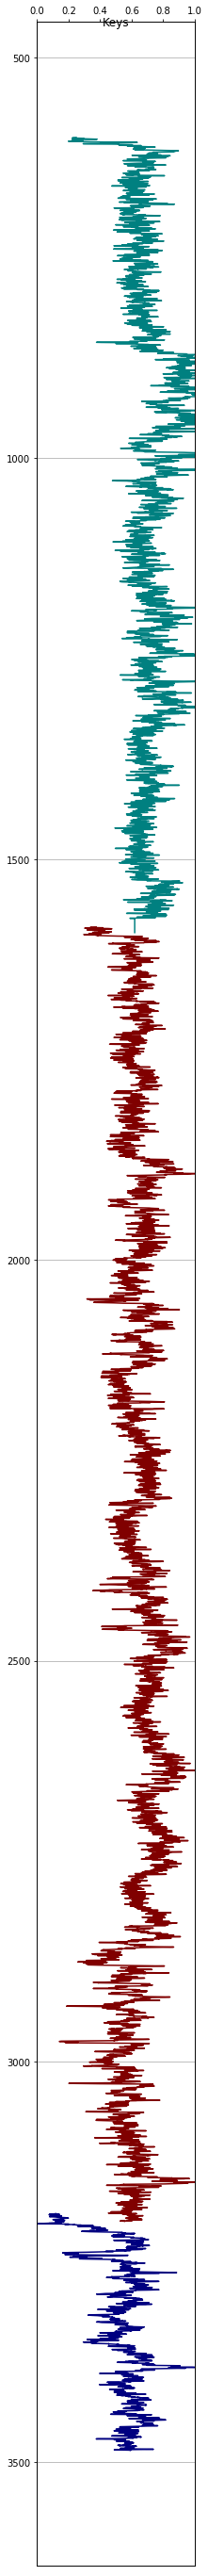

In [10]:
def key_plot(las,key):
#     df=log.df().sort_values([dcol])
#     log.set_data(df)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,60), sharey=True)
#     fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)


    ax.invert_yaxis()
    ax.yaxis.grid(True)
    ax.get_xaxis().set_visible(False) 
    ax.twiny()
    ax.set_title('Keys',verticalalignment='top')

    colors=['#800000',		'#008080',		'#000080',	'#FF00FF',	'#800080',	'#00FFFF',	'#FFFF00','#FF0000',	'#00FF00',	'#008000',	'#0000FF','#808000','#C0C0C0','#D3D3D3',]
    j=0
#     for cols in allcols:
    for l in las:
        dcol=l.keys()[find_depth_indx(l)]
        print(find_keyIndxWithStr(l,key))
        
        try:
            keycol=l.keys()[find_keyIndxWithStr(l,key)[1]]
            log_col=str_array2floats(l[keycol])
            depth_col=str_array2floats(l[dcol])
        
            ax.plot( log_col,depth_col, label=keycol, color=colors[j])
            j +=1
        except:
            pass
    ax.spines['top'].set_position(('outward',0))
    ax.set_xlabel(keycol,color=colors[0])   
    ax.set_xlim(min(log_col),max(log_col))
    ax.tick_params(axis='x', colors=colors[0])
    ax.grid(True)
    return log_col
#         out_pos += 30
#         i +=1
#         j +=1
#         axid +=1
key_plot(las,'GR_ARC')

In [72]:


b
# plt.plot(a,b,'.')
a.__len__()

[  0.00e+00   3.33e-01   6.67e-01 ...,   1.50e+03   1.50e+03   1.50e+03] 
 [  1.00e+00   1.33e+00   1.67e+00 ...,   1.50e+03   1.50e+03   1.50e+03]


4500

In [183]:
depthminmax=(None,None)
if not depthminmax[0]:
    print('yes')

yes


log step size varies... not a log array


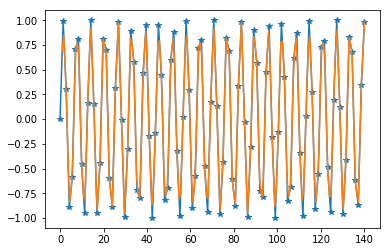

In [176]:
# def resample(given_darray,given_prop,desired_darray):
#     for d in desired_darray:
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return array[idx]        

class FlexArray():
    #Input only a sorted array
    """
    This program is to find out the left and right value inside an array for a given values 
    """
    def __init__(self,sortedarray):
        self.flexarray=np.asarray(sortedarray) 
        self.stepsize=int(np.sqrt(self.flexarray.__len__()))
#         if self.flexarray.__len__()-1<self.stepsize:
#             self.stepsize=self.flexarray.__len__()-1

        self.flexarrIndexRangeArray=np.append(np.arange(0,len(self.flexarray)-1,self.stepsize),self.flexarray.__len__()-1)
    def get_stepsize(self):
        return self.stepsize
        
    def find_indx_nearest(self,array, value):
        array = np.asarray(array)
        return (np.abs(array - value)).argmin()    
        
    def find_indx_leftright(self,array,value):

        if (value>=array[-1]) | (value<=array[0]):
            if (value==array[-1]) | (value==array[0]):
                if (value==array[-1]):
                    return -2,array.__len__()-1
                else:
                    return 0,1
            print ('Value out of range!!')
            return 0
#         array = 
        nearidx=(np.abs(array - value)).argmin()
        if value>array[nearidx]:
            return nearidx,nearidx+1
        elif value<array[nearidx]:
            return nearidx-1,nearidx
        else:
            return nearidx-1,nearidx+1
#         for i in range(self.flexarrIndexRangeArray.__len__()-1):
#             self.flexarray[self.flexarrIndexRangeArray[i]:self.flexarrIndexRangeArrayi+1]]
    def find_leftright_indxs(self,value):
        steparray=self.flexarray[self.flexarrIndexRangeArray]
#         print(steparray)
        li,ri=self.find_indx_leftright(steparray,value)
#         print(li,ri,self.flexarrIndexRangeArray[[li,ri]])
        
        smallarray=self.flexarray[self.flexarrIndexRangeArray[li]:self.flexarrIndexRangeArray[ri]+1]
#         print('hey',smallarray)
        lgi,rgi=self.find_indx_leftright(smallarray,value)
        return self.flexarrIndexRangeArray[li]+lgi,self.flexarrIndexRangeArray[li]+rgi     

    def find_leftright_vlaues(self,value):
#         steparray=self.flexarray[self.flexarrIndexRangeArray]
# #         print(steparray)
#         li,ri=self.find_indx_leftright(steparray,value)
#         print(li,ri,self.flexarrIndexRangeArray[[li,ri]])
        
#         smallarray=self.flexarray[self.flexarrIndexRangeArray[li]:self.flexarrIndexRangeArray[ri]+1]
# #         print('hey',smallarray)
#         lgi,rgi=self.find_indx_leftright(smallarray,value)
#         return smallarray[[lgi,rgi]]
        return self.flexarray[[self.find_leftright_indxs(self,value)]]
        
class FlexXY(FlexArray):
    def __init__(self,XY):
        self.XY=XY
        super(FlexXY,self).__init__(self.XY[:,0])
    def get_LRofXYs(self,xvalue):
        li,ri=self.find_leftright_indxs(xvalue)
#         print(li,ri)
        return self.XY[[li,ri],:]
    def get_LRindxOfXYs(self,xvalue):
        li,ri=self.find_leftright_indxs(xvalue)
#         print(li,ri)
        return li,ri
    def predictYgivenX(self,xvalue):
        lr=self.get_LRofXYs(xvalue)
        return lr[0,1]+(xvalue-lr[0,0])*(lr[1,1]-lr[0,1])/(lr[1,0]-lr[0,0])
        
        
    def resampleXY(self,new_xarray):
        newXY=np.zeros((len(new_xarray),2))
        newXY[:,0]=new_xarray
        for newxy in newXY:
            newxy[1]=self.predictYgivenX(newxy[0])
#         print(li,ri)
        return newXY
class FlexLog(FlexXY):
    def __init__(self,XY):
        super(FlexLog,self).__init__(XY)
        self.logstep=np.unique(np.diff(self.XY[:,0].T))        
        if self.logstep.__len__()>1:
            print( 'log step size varies... not a log array')
            return None
    def logExtend(self,newLog,depthminmax=(None,None),replace='top'):
#         newLog=FlexLog(newLog)
        self.toplog='existing'
        if not depthminmax[0]:
            if(newLog[0,0]<self.XY[0,0]):
                depthminmax[0]=newLog[0,0]
                self.toplog='incoming'
            else:                
                depthminmax[0]=self.XY[0,0])
            if(newLog[-1,0]>self.XY[-1,0]):
                depthminmax[1]=newLog[-1,0]
            else:
                depthminmax[1]=self.XY[-1,0])
        flexnewLog=FlexLog(newLog)
        merged_xarray=np.arange(depthminmax[0],depthminmax[1],self.logstep)
        if self.toplog=='existing':
            if replace=='top':
                start_depth_bottom_log=newLog[0,0]
            else:
                start_depth_bottom_log=self.XY[-1,0]+self.logstep[0]
        else:
            if replace=='top':
                start_depth_bottom_log=self.XY[0,0]
            else:
                start_depth_bottom_log=newLog[-1,0]+self.logstep[0]
        
    def clip(self,drange=(None,None)):
        self.XY=self.XY[(self.XY[:,0]>=drange[0]) & (self.XY[:,0]<=drange[1])]
            
        
        
        
# fla=FlexArray(a)
# print(fla.get_stepsize())
# fla.find_leftright_vlaues(200),fla.find_leftright_indxs(200),a[[fla.find_leftright_indxs(200)]]
# fla
np.set_printoptions(edgeitems=3,infstr='inf',linewidth=75, nanstr='nan', precision=2,suppress=False, threshold=1000, formatter=None)
a=np.linspace(0,140,100)
a.shape=len(a),1
c=np.linspace(1,140,200)
# print(a.T,'\n',c)
b=np.sin(a)

xy=np.append(a,b,axis=1)
# xy.reshape(int(len(xy)/2),2)
xy
# a
plt.plot(xy[:,0],xy[:,1],'-*')
# plt.plot(a,b)
flexXY=FlexLog(xy)
# li,ri=flexXY.get_LRindxOfXYs(11.)
# li,ri,xy[[li,ri],:],
# for cv in c:
#     print('********************')
#     lr=flexXY.get_LRofXYs(cv)
#     print(lr,(lr[1,1]-lr[0,1]),(lr[1,0]-lr[0,0]))
#     y=lr[0,1]+(cv-lr[0,0])*(lr[1,1]-lr[0,1])/(lr[1,0]-lr[0,0])
#     print(cv,y)
newxy=flexXY.resampleXY(c)
plt.plot(newxy[:,0],newxy[:,1])

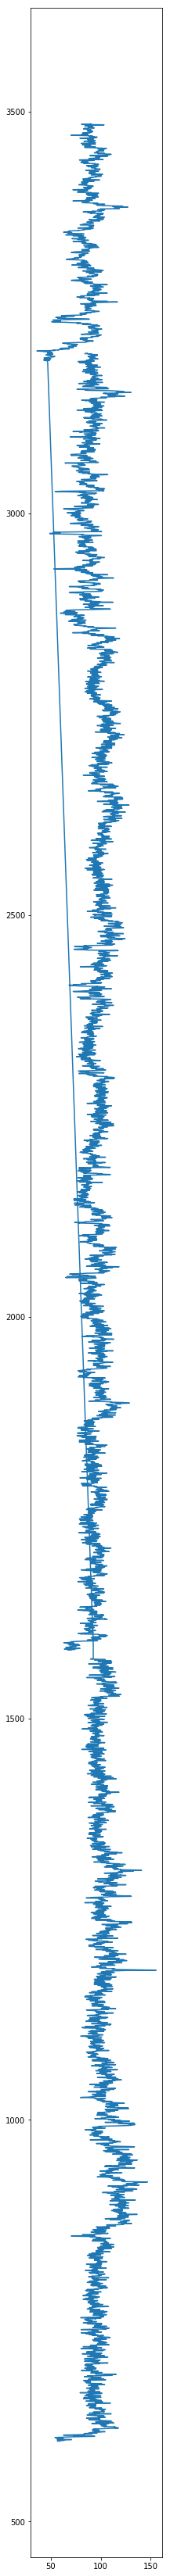

In [11]:
# # for uk in ukeys:
# for l in las:
#     lkeys=l.keys() 
#     print(lkeys)
# #         if ('DEPT' in lkeys) & ( uk in lkeys):
# #             print(l[uk])
# #     break

    
def log_splice(las,key,drange=(0,np.nan)):
    log_col=[]
    depth_col=[]
    if drange[0]==0 & np.isnan(drange[1]):
        for l in las:
            dcol=l.keys()[find_depth_indx(l)]       
            try:
                keycol=l.keys()[find_keyIndxWithStr(l,key)[1]]
                log_col.extend(str_array2floats(l[keycol]))
                depth_col.extend(str_array2floats(l[dcol]))
            except:
                pass
    return log_col,depth_col
fig = plt.subplots(figsize=(3,60))
lc,dc= log_splice(las,'GR_ARC')
plt.plot(lc,dc)   
plt.show()

In [73]:
# #finding depth ranges
# skey='DEPT'
# for uk in ukeys:
#     print(uk)
#     for l in las:
#         lkeys=l.keys() 
#     #     print(lkeys)
#         if (skey in lkeys) :
#             print(min(l[skey]),max(l[skey]))
#     print('****************************************')
np.diff(dc),
np.arange(min(dc), max(dc),0.1524)

array([  599.9988,   600.1512,   600.3036, ...,  3495.7512,  3495.9036,
        3496.056 ])

In [111]:

for c in las[0].curves:
    print(c.mnemonic)
    
    
    c.data=str_array2floats(c.data)
    print(c.data.dtype)
    print(c.data)
#     print(str_array2floats(c.data))

TIME
<U8
['04:43:18' '04:43:38' '04:42:48' ..., '13:27:28' '13:27:38' '13:27:48']
DATE
<U9
['01-Oct-06' '01-Oct-06' '01-Oct-06' ..., '06-Oct-06' '06-Oct-06'
 '06-Oct-06']
RM_DEPTH
float64
[ 1536.62  1536.62  1536.62 ...,  3211.65  3211.65  3211.67]
ECD_ARC
float64
[ 11.18  11.19  11.17 ...,  13.52  13.52  13.51]
APRS_ARC
float64
[ 2899.  2902.  2897. ...,  6330.  6330.  6328.]
ATMP
float64
[ 60.  60.  60. ...,  98.  98.  98.]


In [110]:
# las[0].curves[1].data
# las[0].df()

In [52]:
las[0].df()['RM_DEPTH'].values

array(['1536.71', '1536.69', '1536.69', ..., '3187.48', '3187.48',
       '3187.48'], dtype=object)

In [22]:
las[0].curves[3].data
las[0].header
las[0].data.shape

las[0].curves.CurveItem

AttributeError: 'super' object has no attribute '__getattr__'

In [290]:



# lindx2bplotted

# cols

In [176]:
n=np.array(range(25))
n%4,((n-n%4)/4)%4
# log.header

(array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
        3, 0], dtype=int32),
 array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,
         3.,  3.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.]))

In [287]:
# log[log.keys()[dindx]]
# log.df().sort_values([log.keys()[dindx]])
# log[cols[indx]]
# log[cols[indx]], log[cols[dindx]]
# len(log.keys())/4
# allcols=log.keys()
# allcols=np.array(allcols)
# allcols.shape=(9,4)
# allcols
# for cols in allcols:
#     for c in cols:
#         print(log[c])

In [289]:

# triple_combo_plot2(log,4180,4220)